## NDR/IDS Project

##### Intrusion Detection Systems (IDS) are essential tools in network security, helping to identify and respond to potential threats in real-time. The KDD Cup 1999 dataset is a well-known and widely used dataset for training and evaluating IDS models. The dataset contains a large collection of network traffic data, including both normal and malicious traffic, allowing researchers to develop and test models that can accurately detect intrusions in network traffic. In this project, we will use the KDD Cup 1999 dataset to build an IDS model that can effectively identify and classify different types of network attacks. Through this project, we aim to contribute to the development of robust and effective IDS systems that can help enhance network security and prevent cyber-attacks.

## The KDD 1999 dataset consists of 42 attributes
##### duration :       length (number of seconds) of the connection        
##### protocol_type :  type of the protocol, e.g. tcp, udp, etc.        
##### service :        network service on the destination, e.g., http, telnet, etc.        
##### flag :           normal or error status of the connection        
##### src_bytes :      number of data bytes from source to destination        
##### dst_bytes :      number of data bytes from destination to source        
##### land :           1 if connection is from/to the same host/port; 0 otherwise        
##### wrong_fragment : number of ''wrong'' fragments        
##### urgent :         number of urgent packets        
##### hot :            number of ''hot'' indicators        
##### num_failed_logins : number of failed login attempts        
##### logged_in :      1 if successfully logged in; 0 otherwise        
##### num_compromised : number of ''compromised'' conditions        
##### root_shell :     1 if root shell is obtained; 0 otherwise        
##### su_attempted :   1 if ''su root'' command attempted; 0 otherwise        
##### num_root :       number of ''root'' accesses        
##### num_file_creations : number of file creation operations        
##### num_shells :     number of shell prompts        
##### num_access_files : number of operations on access control files        
##### num_outbound_cmds : number of outbound commands inn ftp session        
##### is_host_login :   1 if the login belongs to the ''hot'' list; 0 otherwise        
##### is_guest_login :  1 if the login is a ''guest''login; 0 otherwise        
##### srv_count :       number of connections to the same host as the current connection in the past two seconds        
##### serror_rate :     % of connections that have ''SYN'' errors        
##### srv_serror_rate : % of connections that have ''SYN'' errors        
##### rerror_rate :     % of connections that have ''REJ'' errors        
##### srv_rerror_rate : % of connections that have ''REJ'' errors        
##### same_srv_rate :   % of connections to the same service        
##### diff_srv_rate :   % of connections to different services        
##### srv_diff_host_rate : % of connections to different hosts        
##### dst_host_count :   number of connections to the same host as the current connection in the past two seconds        
##### dst_host_srv_count : number of connections to the same host as the current connection in the past two seconds        
##### dst_host_same_srv_rate : % of connections to the same service        
##### dst_host_diff_srv_rate : % of connections to different services        
##### dst_host_same_src_port_rate : % of connections to the same source port        
##### dst_host_srv_diff_host_rate : % of connections to different hosts        
##### dst_host_serror_rate : % of connections that have ''SYN'' errors        
##### dst_host_srv_serror_rate : % of connections that have ''SYN'' errors        
##### dst_host_rerror_rate : % of connections that have ''REJ'' errors        
##### dst_host_srv_rerror_rate : % of connections that have ''REJ'' errors        
##### label : normal or anomaly status of the connection

In [2]:
import pandas as pd
import numpy as np
import gzip
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

import os
import time

In [3]:
old_df = pd.read_csv('D:/NDR Project/DataSets/KDD_CUP_99/kddcup.data_10_percent.gz', header=None)
columns = pd.read_csv('D:/NDR Project/DataSets/KDD_CUP_99/kddcup.names',header=None)

old_df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(columns)
print(len(columns))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']
42


In [5]:
with open('D:/NDR Project/DataSets/KDD_CUP_99/training_attack_types', 'r') as f:
    attack_types = f.read()
    print(attack_types)

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [6]:
## Creating a dictionary of attack types
types = dict()
types['normal'] = 'normal'
for line in attack_types.split("\n"):
    if line:
        attack, description = line.split(" ", 1)
        types[attack] = description

print(types)

{'normal': 'normal', 'back': 'dos', 'buffer_overflow': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe', 'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 'spy': 'r2l', 'teardrop': 'dos', 'warezclient': 'r2l', 'warezmaster': 'r2l'}


In [7]:
path = "D:/NDR Project/DataSets/KDD_CUP_99/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:types[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [8]:
df.shape

(494021, 43)

In [9]:
df['target'].value_counts()

target
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [10]:
df['Attack Type'].value_counts()

Attack Type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

In [11]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

## DATA PREPROCESSING

In [12]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [13]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'flag', 'service']

## CATEGORICAL FEATURES DISTRIBUTION

In [14]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

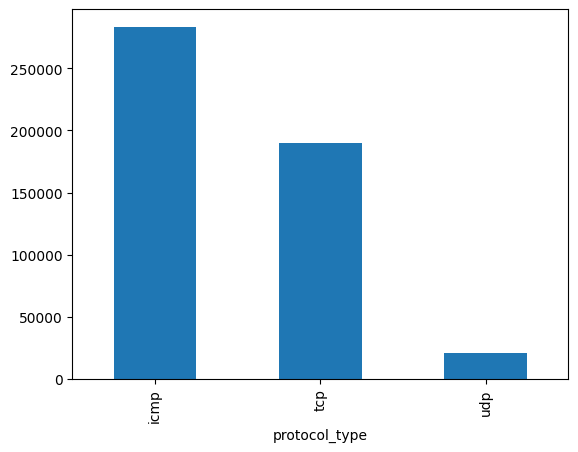

In [15]:
bar_graph('protocol_type')

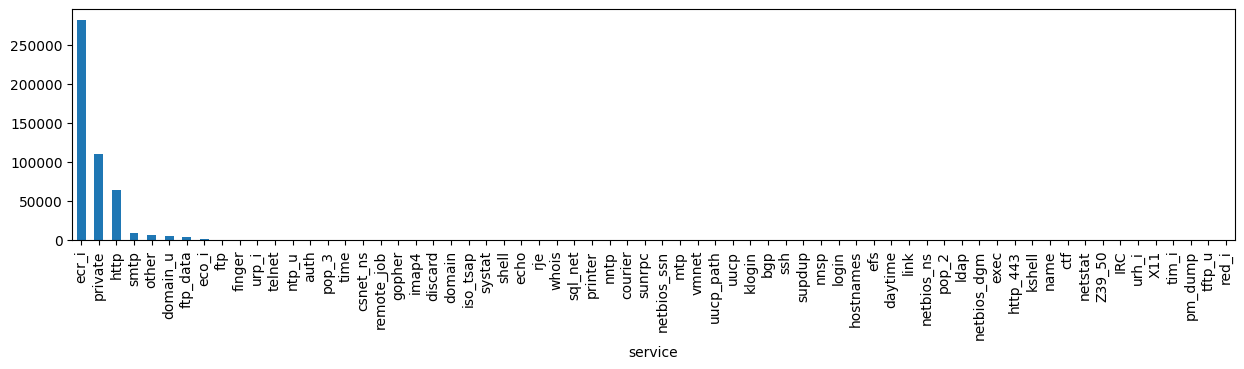

In [16]:
plt.figure(figsize=(15,3))
bar_graph('service')

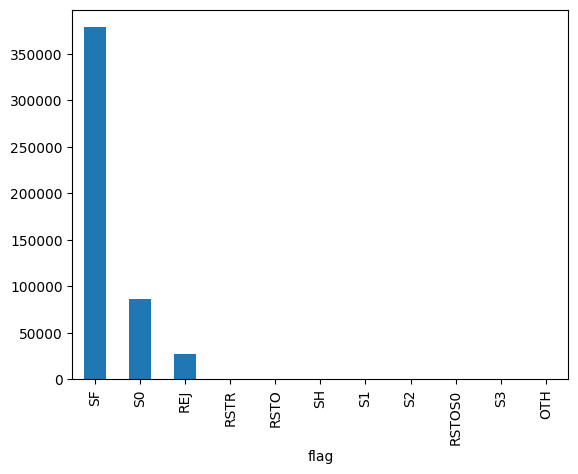

In [17]:
bar_graph('flag')

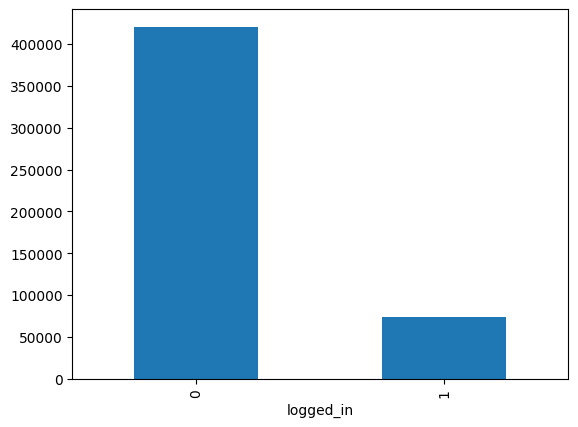

In [18]:
bar_graph('logged_in')

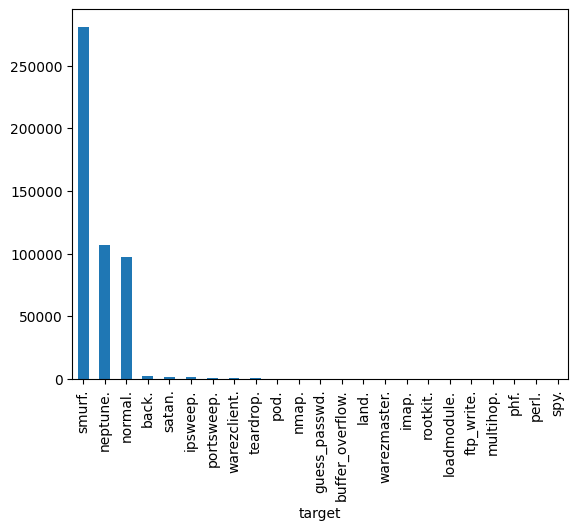

In [19]:
bar_graph('target')

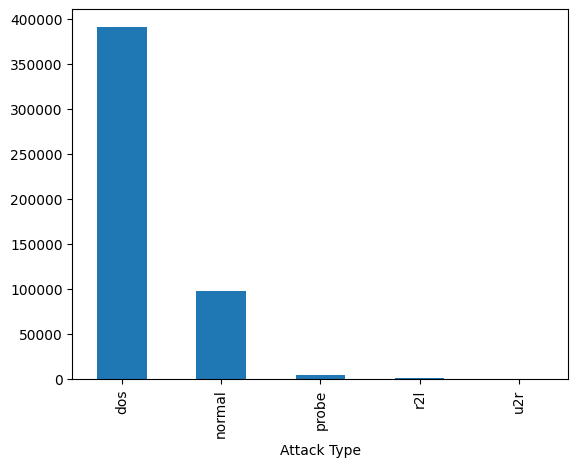

In [20]:
bar_graph('Attack Type')

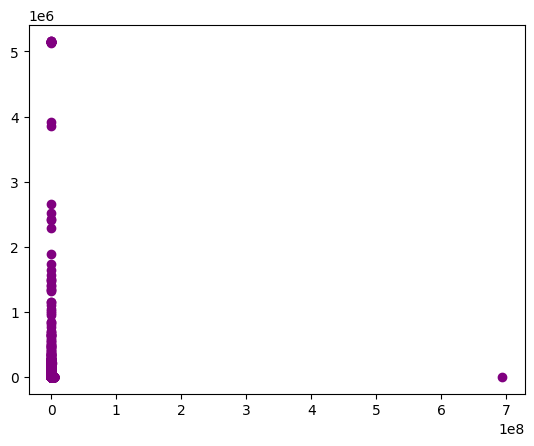

In [21]:
plt.scatter(df['src_bytes'], df['dst_bytes'], color = 'purple')

In [22]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

In [23]:
df = df.dropna('columns') # drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

TypeError: DataFrame.dropna() takes 1 positional argument but 2 were given

In [24]:
df['num_root'].corr(df['num_compromised'])

0.9938277978737942

In [25]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998361507272552

In [26]:
df['srv_count'].corr(df['count'])

0.9436670688882602

In [27]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539818258

In [28]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572954081

In [29]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173372515

In [30]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110593

In [31]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.927808034269101

In [32]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630324231

In [33]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449263676783239

In [34]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.998672968010501

In [35]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.997835300373953

In [36]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485679238

In [37]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041091850208

In [38]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9869947924955924

In [39]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308904

In [40]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751091

In [41]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845588

In [42]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [43]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [44]:
df.shape

(494021, 35)

In [45]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [46]:
df['protocol_type'].value_counts()

protocol_type
icmp    283602
tcp     190065
udp      20354
Name: count, dtype: int64

In [47]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [48]:
df['service'].value_counts()

service
ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: count, Length: 66, dtype: int64

In [49]:
df['flag'].value_counts()

flag
SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: count, dtype: int64

In [50]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [51]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [52]:
df.drop('service',axis = 1,inplace= True)

In [53]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [54]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate            

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [56]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 33)
(330994, 32) (163027, 32)
(330994, 1) (163027, 1)


In [57]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [58]:
print("Training time: ",end_time-start_time)

Training time:  0.44909095764160156


In [59]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [60]:
print("Testing time: ",end_time-start_time)

Testing time:  0.26555657386779785


In [61]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8795114110829804
Test score is: 0.8790384414851528


In [62]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [63]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [64]:
print("Training time: ",end_time-start_time)

Training time:  0.7971265316009521


In [65]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [66]:
print("Testing time: ",end_time-start_time)

Testing time:  0.02065443992614746


In [67]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9905829108684749
Test score is: 0.9905230421954646


In [68]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=30)

In [69]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  5.8968305587768555


In [70]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.36883997917175293


In [71]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.99997583037759
Test score is: 0.9996258288504358


In [72]:
from sklearn.svm import SVC
model4 = SVC(gamma = 'scale')

In [73]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  232.0384120941162


In [74]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  54.51602649688721


In [76]:
from sklearn.linear_model import LogisticRegression
model5 = LogisticRegression(max_iter=1200000)

In [75]:
# df_std = df.std()
# df_std = df_std.sort_values(ascending = True)
# df_std